In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [8]:
df.shape

(3571, 18)

In [9]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,4.75,12623.0,3,5,3+,4.0,Relatively New,3405.0,0,1,0,0,0,0,42
1,flat,ild greens,sector 37c,0.90,5614.0,3,3,3,0.0,Under Construction,1500.0,0,0,0,0,0,1,66
2,flat,signature global synera,sector 81,0.45,7525.0,2,2,2,6.0,Relatively New,664.0,0,0,1,0,0,0,39
3,house,independent,sector 43,9.85,29642.0,5,5,2,3.0,Old Property,3323.0,1,1,0,1,0,1,21
4,flat,sare homes,sector 92,0.80,4695.0,4,4,3,1.0,Moderately Old,1893.0,0,0,0,0,0,1,77


In [10]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 112,4.75,3,5,3+,4.0,Relatively New,3405.0,0,1,0,0,0,0,42
1,flat,sector 37c,0.90,3,3,3,0.0,Under Construction,1500.0,0,0,0,0,0,1,66
2,flat,sector 81,0.45,2,2,2,6.0,Relatively New,664.0,0,0,1,0,0,0,39
3,house,sector 43,9.85,5,5,2,3.0,Old Property,3323.0,1,1,0,1,0,1,21
4,flat,sector 92,0.80,4,4,3,1.0,Moderately Old,1893.0,0,0,0,0,0,1,77


In [14]:
train_df.columns

Index(['property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

In [21]:
numerical_cols = train_df.columns[train_df.dtypes!="object"]

<Axes: >

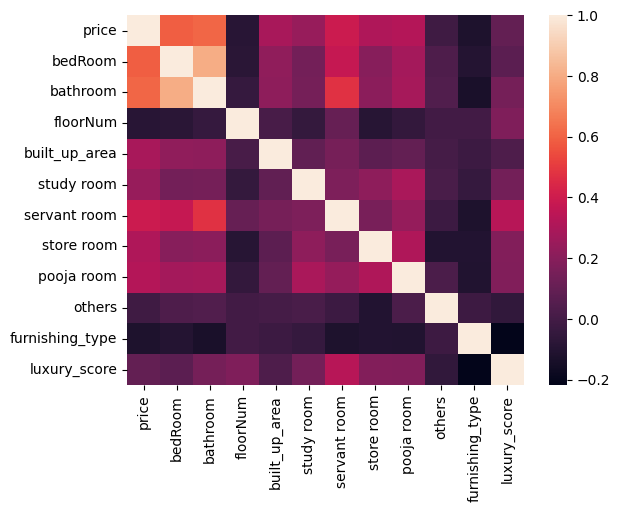

In [22]:
sns.heatmap(train_df[numerical_cols].corr())

In [24]:
train_df[numerical_cols].corr()['price'].sort_values(ascending=False)

price              1.000000
bathroom           0.608450
bedRoom            0.590452
servant room       0.394148
pooja room         0.322283
store room         0.309729
built_up_area      0.291542
study room         0.241210
luxury_score       0.095048
others            -0.013606
floorNum          -0.085812
furnishing_type   -0.117601
Name: price, dtype: float64

In [ ]:
# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession

In [28]:
df[df.columns[df.dtypes!='object']].corr()['price']

price              1.000000
price_per_sqft     0.769746
bedRoom            0.590452
bathroom           0.608450
floorNum          -0.085812
built_up_area      0.291542
study room         0.241210
servant room       0.394148
store room         0.309729
pooja room         0.322283
others            -0.013606
furnishing_type   -0.117601
luxury_score       0.095048
Name: price, dtype: float64